In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from analysis_dependencies import get_wrf_slp
from analysis_dependencies import get_wrf_rh
from analysis_dependencies import gen_wrf_proj
from analysis_dependencies import gen_cartopy_proj
from analysis_dependencies import get_xsect
import datetime
import wrf
import cartopy
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import xarray as xr

In [2]:
unpDir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/final_runs/march2020/R_mu/unperturbed/'
ptdDir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/final_runs/march2020/R_mu/negative/uvTq/ptdi14/'
arcDir = '/home/bhoover/UWAOS/WRF_QOIP/data_repository/case_archives/march2020/R_mu/negative/uvTq/'
arcPtd = '14'
dtInit = datetime.datetime(2020, 3, 6, 12)

In [3]:
fcstHr = 24
dtFcst = dtInit + datetime.timedelta(hours=fcstHr)
dtInitStr = datetime.datetime.strftime(dtInit,'%Y-%m-%d_%H:00:00')
dtFcstStr = datetime.datetime.strftime(dtFcst,'%Y-%m-%d_%H:00:00')
unpWRFInputFile = arcDir + 'wrfinput_d01_unpi00'
ptdWRFInputFile = arcDir + 'wrfinput_d01_ptdi' + arcPtd
unpFileInit = unpDir + 'wrfout_d01_' + dtInitStr
ptdFileInit = ptdDir + 'wrfout_d01_' + dtInitStr
unpFileFcst = unpDir + 'wrfout_d01_' + dtFcstStr
ptdFileFcst = ptdDir + 'wrfout_d01_' + dtFcstStr
unpHdlInit = Dataset(unpFileInit)
ptdHdlInit = Dataset(ptdFileInit)
unpHdlFcst = Dataset(unpFileFcst)
ptdHdlFcst = Dataset(ptdFileFcst)

In [64]:
lat = np.asarray(unpHdlInit.variables['XLAT']).squeeze()
lon = np.asarray(unpHdlInit.variables['XLONG']).squeeze()
fix = np.where(lon < 0.)
lon[fix] = lon[fix] + 360.

datProj = gen_cartopy_proj(unpHdlInit)
plotProj = ccrs.PlateCarree()

unpSLPInit = np.asarray(get_wrf_slp(unpHdlInit)).squeeze()
ptdSLPInit = np.asarray(get_wrf_slp(ptdHdlInit)).squeeze()
unpSLPFcst = np.asarray(get_wrf_slp(unpHdlFcst)).squeeze()
ptdSLPFcst = np.asarray(get_wrf_slp(ptdHdlFcst)).squeeze()

unpRHInit = np.asarray(get_wrf_rh(unpHdlInit)).squeeze()
ptdRHInit = np.asarray(get_wrf_rh(ptdHdlInit)).squeeze()

unpHGTInit = np.asarray(wrf.getvar(unpHdlInit,'z')).squeeze()
ptdHGTInit = np.asarray(wrf.getvar(ptdHdlInit,'z')).squeeze()
unpHGTFcst = np.asarray(wrf.getvar(unpHdlFcst,'z')).squeeze()
ptdHGTFcst = np.asarray(wrf.getvar(ptdHdlFcst,'z')).squeeze()

unpTHTAInit = np.asarray(wrf.getvar(unpHdlInit,'theta')).squeeze()
ptdTHTAInit = np.asarray(wrf.getvar(ptdHdlInit,'theta')).squeeze()
unpTHTAFcst = np.asarray(wrf.getvar(unpHdlFcst,'theta')).squeeze()
ptdTHTAFcst = np.asarray(wrf.getvar(ptdHdlFcst,'theta')).squeeze()

unpPInit = np.asarray(wrf.getvar(unpHdlInit,'p')).squeeze()
ptdPInit = np.asarray(wrf.getvar(ptdHdlInit,'p')).squeeze()
unpPFcst = np.asarray(wrf.getvar(unpHdlFcst,'p')).squeeze()
ptdPFcst = np.asarray(wrf.getvar(ptdHdlFcst,'p')).squeeze()

plevs=np.arange(1000.,102000.,50.)

In [ ]:
# compute 850 and 500 potential temperature
pk = 85000.  # Pa
unpVar1 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar1 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpVar2 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar2 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpHGT850Init = unpVar1
unpHGT500Init = unpVar2
unpThk850_500Init = unpVar2 - unpVar1
ptdHGT850Init = ptdVar1
ptdHGT500Init = ptdVar2
ptdThk850_500Init = ptdVar2 - ptdVar1
pk = 85000.  # Pa
unpVar1 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar1 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpVar2 = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar2 = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpHGT850Fcst = unpVar1
unpHGT500Fcst = unpVar2
unpThk850_500Fcst = unpVar2 - unpVar1
ptdHGT850Fcst = ptdVar1
ptdHGT500Fcst = ptdVar2
ptdThk850_500Fcst = ptdVar2 - ptdVar1

In [52]:
# compute 850 and 500 geopotential heights, 850-500 thicknesses
pk = 85000.  # Pa
unpVar1 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar1 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpVar2 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar2 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpHGT850Init = unpVar1
unpHGT500Init = unpVar2
unpThk850_500Init = unpVar2 - unpVar1
ptdHGT850Init = ptdVar1
ptdHGT500Init = ptdVar2
ptdThk850_500Init = ptdVar2 - ptdVar1
pk = 85000.  # Pa
unpVar1 = wrf.interplevel(field3d=unpHGTInit,
                          vert=unpPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar1 = wrf.interplevel(field3d=ptdHGTInit,
                          vert=ptdPInit,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
pk = 50000.  # Pa
unpVar2 = wrf.interplevel(field3d=unpHGTFcst,
                          vert=unpPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
ptdVar2 = wrf.interplevel(field3d=ptdHGTFcst,
                          vert=ptdPFcst,
                          desiredlev=pk,
                          missing=np.nan,
                          squeeze=True,
                          meta=False)
unpHGT850Fcst = unpVar1
unpHGT500Fcst = unpVar2
unpThk850_500Fcst = unpVar2 - unpVar1
ptdHGT850Fcst = ptdVar1
ptdHGT500Fcst = ptdVar2
ptdThk850_500Fcst = ptdVar2 - ptdVar1

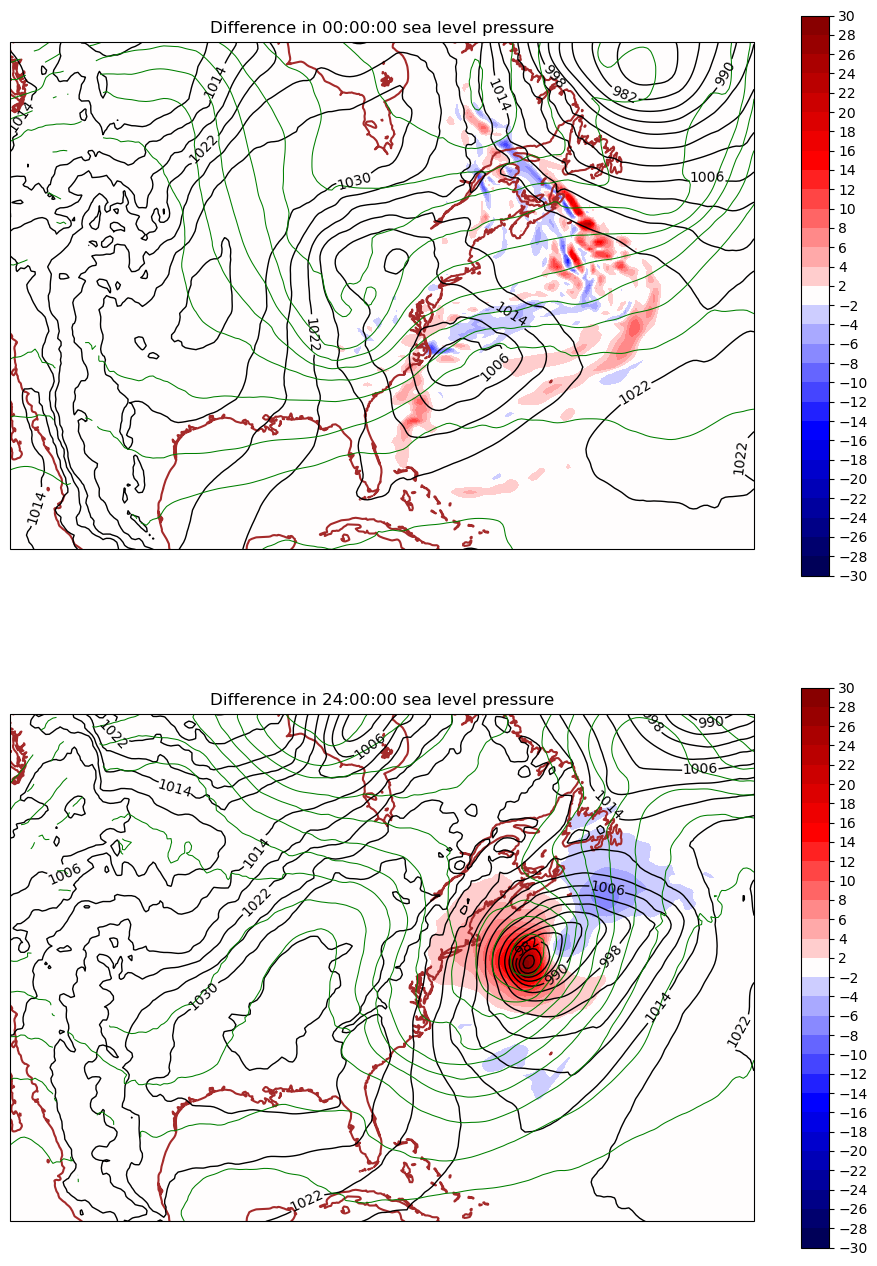

In [49]:
shdrng = np.arange(-30.,30.1,2.)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False
slprng = np.arange(950.,1050.1,4.)
thkrng = np.arange(3700.,4500.1,50.)
fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': datProj}, figsize=(12,16))

ax = ax1
shd=ax.contourf(lon,lat,ptdSLPInit-unpSLPInit,shdrng[mask],cmap='seismic',transform=plotProj)
slp=ax.contour(lon,lat,unpSLPInit,slprng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(slp,levels=slprng[::2])
thk=ax.contour(lon,lat,unpThk850_500Init,thkrng,colors='green',linewidths=0.75,transform=plotProj)
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in 00:00:00 sea level pressure')

ax = ax2
shd=ax.contourf(lon,lat,ptdSLPFcst-unpSLPFcst,shdrng[mask],cmap='seismic',transform=plotProj)
slp=ax.contour(lon,lat,unpSLPFcst,slprng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(slp,levels=slprng[::2])
thk=ax.contour(lon,lat,unpThk850_500Fcst,thkrng,colors='green',linewidths=0.75,transform=plotProj)
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in ' + str(fcstHr) + ':00:00 sea level pressure')

plt.show()

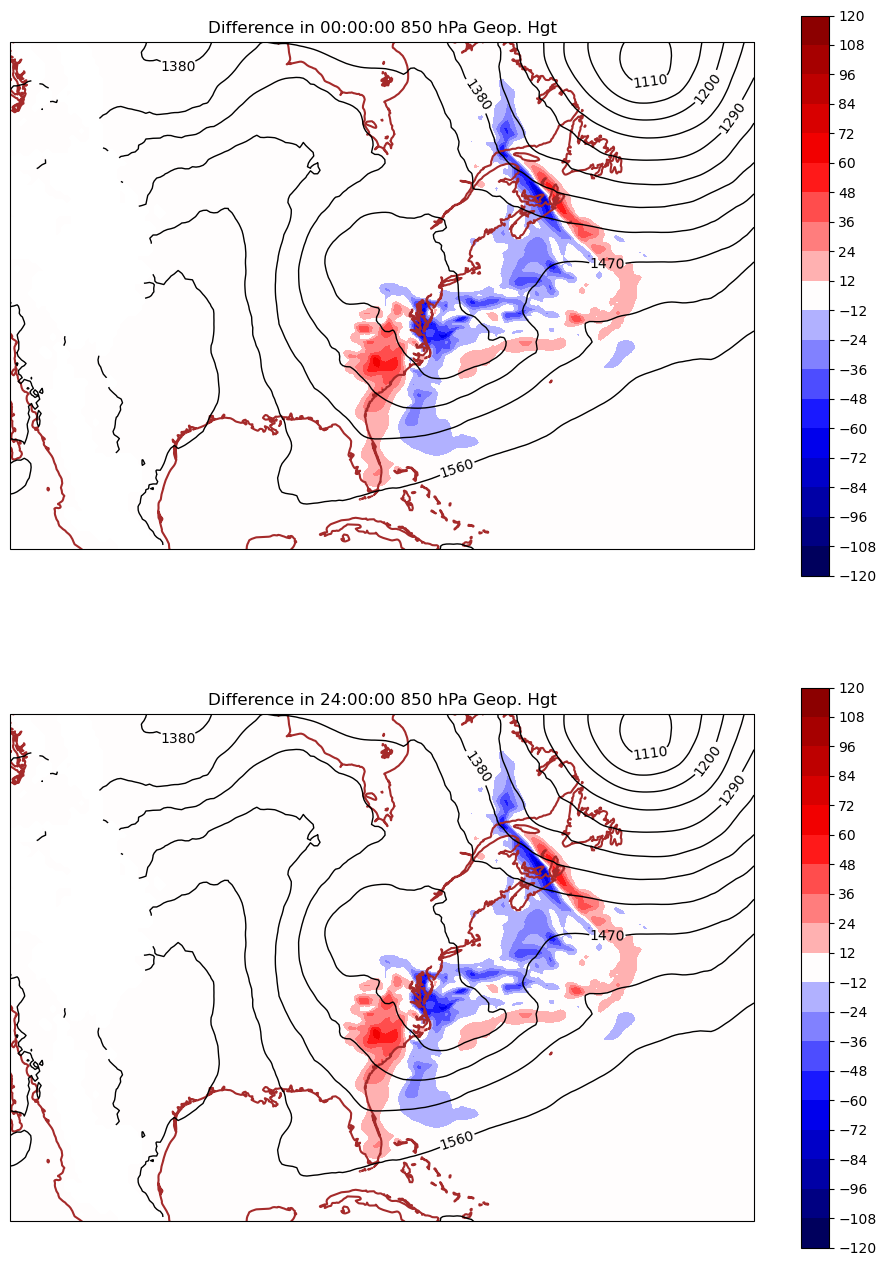

In [62]:
shdrng = np.arange(-120.,120.1,12.)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False
hgtrng = np.arange(1020.,1700.1,45.)

fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': datProj}, figsize=(12,16))

ax = ax1
shd=ax.contourf(lon,lat,ptdHGT850Init-unpHGT850Init,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT850Init,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in 00:00:00 850 hPa Geop. Hgt')

ax = ax2
shd=ax.contourf(lon,lat,ptdHGT850Fcst-unpHGT850Fcst,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT850Fcst,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in ' + str(fcstHr) + ':00:00 850 hPa Geop. Hgt')

plt.show()

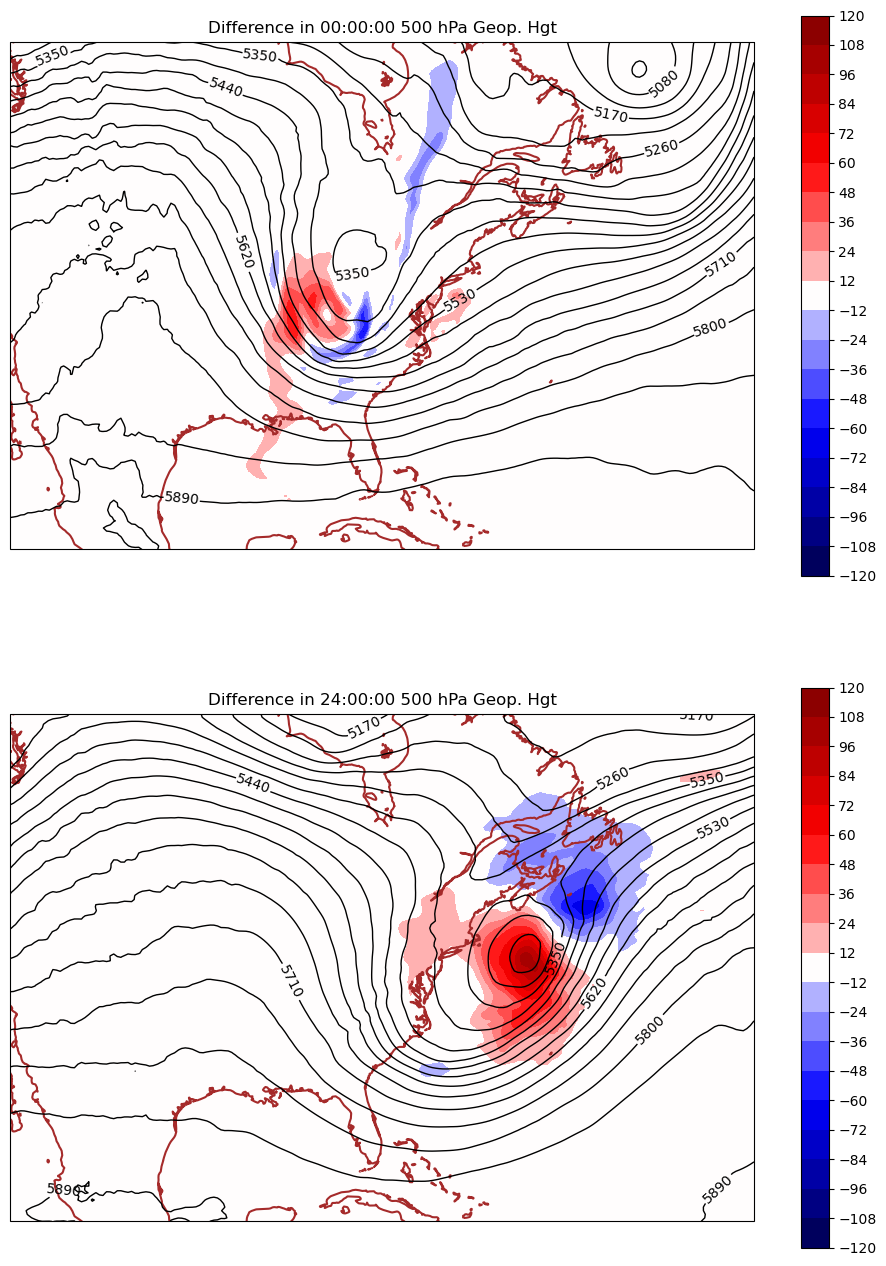

In [63]:
shdrng = np.arange(-120.,120.1,12.)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False
hgtrng = np.arange(4900.,6100.1,45.)

fig, (ax1, ax2) = plt.subplots(nrows=2, subplot_kw={'projection': datProj}, figsize=(12,16))

ax = ax1
shd=ax.contourf(lon,lat,ptdHGT500Init-unpHGT500Init,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT500Init,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in 00:00:00 500 hPa Geop. Hgt')

ax = ax2
shd=ax.contourf(lon,lat,ptdHGT500Fcst-unpHGT500Fcst,shdrng[mask],cmap='seismic',transform=plotProj)
hgt=ax.contour(lon,lat,unpHGT500Fcst,hgtrng,colors='black',linewidths=1.0,transform=plotProj)
ax.clabel(hgt,levels=hgtrng[::2])
ax.add_feature(cfeature.COASTLINE,color='brown',linewidth=1.5)
plt.colorbar(ax=ax,mappable=shd,ticks=shdrng[mask])
ax.set_title('Difference in ' + str(fcstHr) + ':00:00 500 hPa Geop. Hgt')

plt.show()

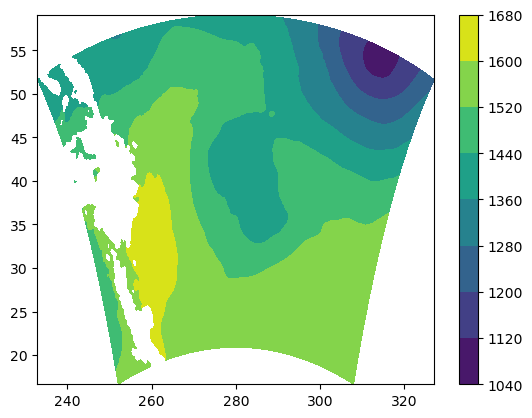

In [61]:
plt.contourf(lon,lat,unpHGT850Fcst)
plt.colorbar()
plt.show()

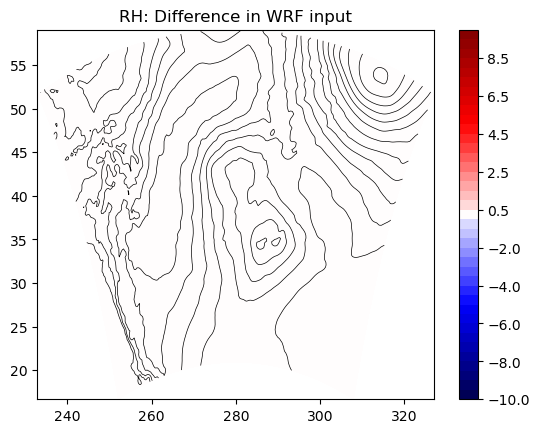

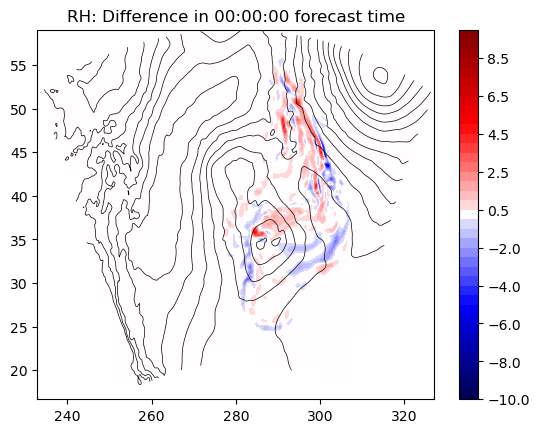

In [6]:
k = 0

shdrng = np.arange(-10.,10.1,0.5)
mask = np.ones((np.shape(shdrng)),dtype='bool')
mask[np.where(shdrng==0.)] = False

shd=plt.contourf(lon,lat,ptdRHInput[k,:,:].squeeze()-unpRHInput[k,:,:].squeeze(),shdrng[mask],cmap='seismic')
plt.contour(lon,lat,unpSLPInit,np.arange(960.,1042.1,4.),colors='black',linewidths=0.5)
plt.colorbar(mappable=shd)
plt.title('RH: Difference in WRF input')
plt.show()

shd=plt.contourf(lon,lat,ptdRHInit[k,:,:].squeeze()-unpRHInit[k,:,:].squeeze(),shdrng[mask],cmap='seismic')
plt.contour(lon,lat,unpSLPInit,np.arange(960.,1042.1,4.),colors='black',linewidths=0.5)
plt.colorbar(mappable=shd)
plt.title('RH: Difference in 00:00:00 forecast time')
plt.show()

In [13]:
z=wrf.getvar(ptdHdlFcst,'z')-wrf.getvar(unpHdlFcst,'z')
xSect,latList,lonList = get_xsect(unpHdlInit,z,30.,280.,45.,310.)

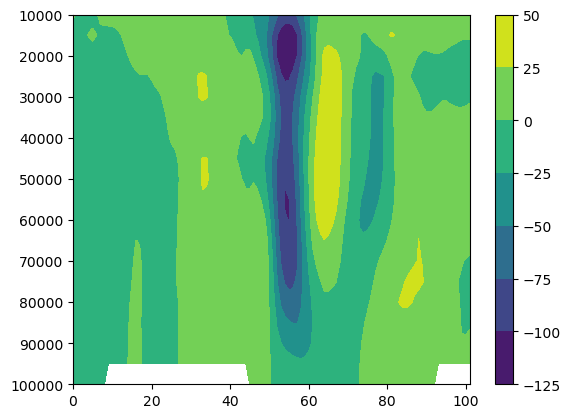

In [14]:
plt.contourf(np.arange(len(latList)),np.arange(10000.,102000.1,5000.),xSect)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

In [17]:
proj=gen_wrf_proj(unpHdlInit)
xbeg=wrf.CoordPair(lat=30.,lon=280.)
xend=wrf.CoordPair(lat=45.,lon=310.)

rh=get_wrf_rh(unpHdlInit)
#rh=dim_coord_swap(rh,wrf.getvar(unpHdlInit,'p'))

unpX = wrf.vertcross(field3d=rh,
                     vert=wrf.getvar(unpHdlInit,'p'),
                     levels=np.arange(10000.,102000.1,5000.),
                     missing=np.nan,
                     wrfin=unpHdlInit,
                     stagger='m',
                     projection=proj,
                     start_point=xbeg,
                     end_point=xend,
                     latlon=True
                     )
pointLats=[]
pointLons=[]
for point in unpX.xy_loc.values:
    pointLatLonStr = point.latlon_str().split(', ')
    pointLats.append(float(pointLatLonStr[0]))
    pointLons.append(float(pointLatLonStr[1]))

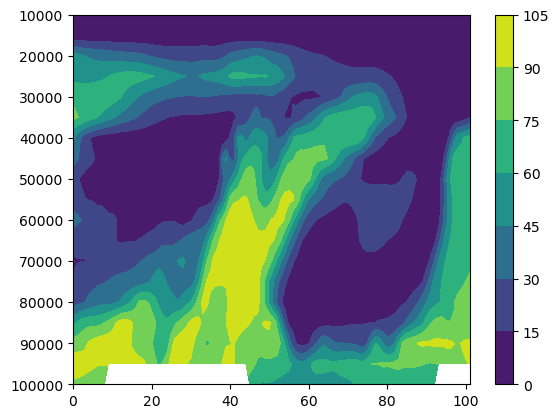

In [18]:
plt.contourf(np.arange(len(pointLats)),np.arange(10000.,102000.1,5000.),unpX)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

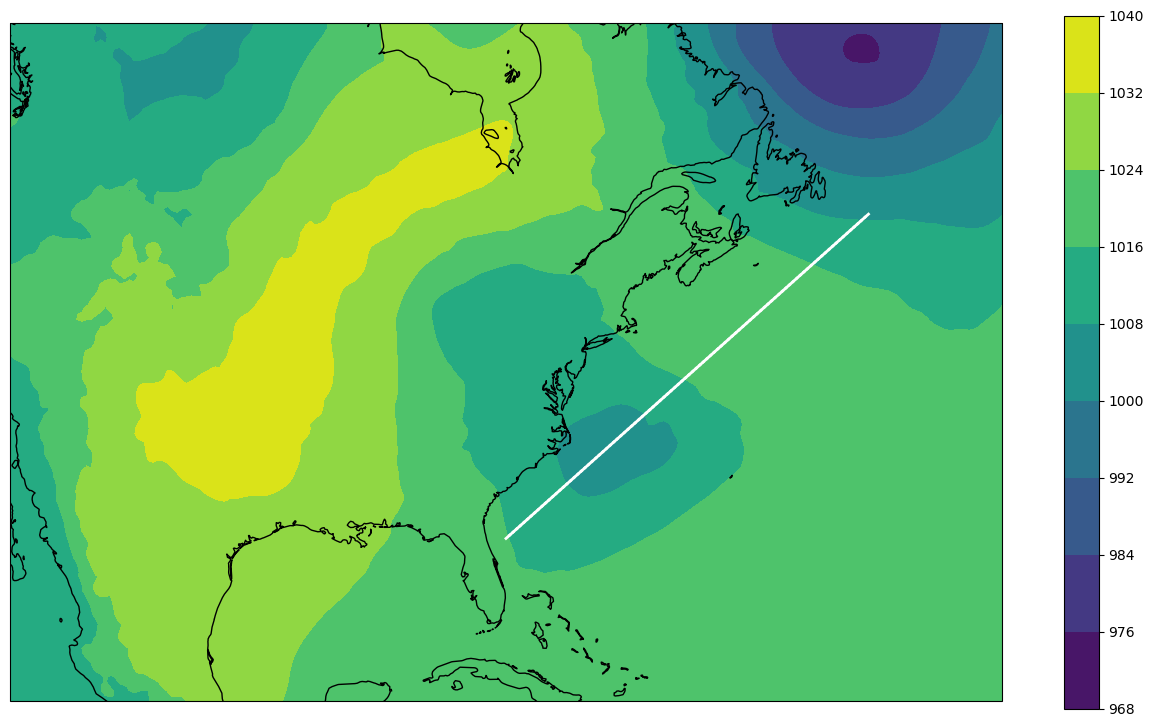

In [9]:
dat_proj = gen_cartopy_proj(unpHdlInit)
plot_proj = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,9))
ax=plt.axes(projection=dat_proj)
shd=ax.contourf(lon,lat,unpSLPInit,transform=plot_proj,zorder=0)
fig.colorbar(ax=ax,mappable=shd)
for i in range(len(pointLons)-1):
    lin=ax.plot((pointLons[i],pointLons[i+1]),(pointLats[i],pointLats[i+1]),color='w',linewidth=2.,transform=plot_proj)
ax.add_feature(cfeature.COASTLINE,zorder=1)
plt.show()